In [5]:
#!python3.7 -m pip install PyPortfolioOpt

    100% |████████████████████████████████| 5.4MB 253kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/3e/7e/5cee36eee5b3194687232f6150a89a38f784883c612db7f4da2ab190980d/scipy-1.2.1-cp37-cp37m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 10.1MB 138kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/91/e7/6c780e612d245cca62bc3ba8e263038f7c144a96a54f877f3714a0e8427e/numpy-1.16.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/61/28/1d3920e4d1d50b19bc5d24398a7cd85cc7b9a75a490570d5a30c57622d34/pytz-2018.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl


In [12]:
import pandas as pd
import numpy as np
import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt
%matplotlib inline

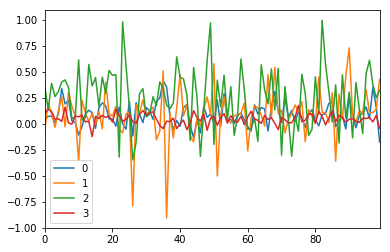

In [3]:
# generate data
rdata = np.random.randn(100, 4)

data = pd.DataFrame()
data[0] = rdata[:, 0]*0.1 + 0.1
data[1] = rdata[:, 0]*rdata[:, 1]*0.2 + 0.1
data[2] = rdata[:, 2]*0.3 + 0.3
data[3] = 0.05 + rdata[:, 3]*0.05
data.plot()

In [4]:
print(data.mean(),data.cov(), sep='\n')

0    0.085660
1    0.090611
2    0.246439
3    0.045193
dtype: float64
          0         1         2         3
0  0.012863  0.002784  0.002726 -0.000577
1  0.002784  0.054527 -0.000291 -0.000174
2  0.002726 -0.000291  0.079112 -0.001904
3 -0.000577 -0.000174 -0.001904  0.002568


In [5]:
def markovitz(data, target_return):
  ef = EfficientFrontier(data.mean(), data.cov(), weight_bounds=(-1, 1))
  proportions = ef.efficient_return(target_return)
  mean, std, sharpe = ef.portfolio_performance(risk_free_rate=0, verbose=False)
  return proportions, mean, std

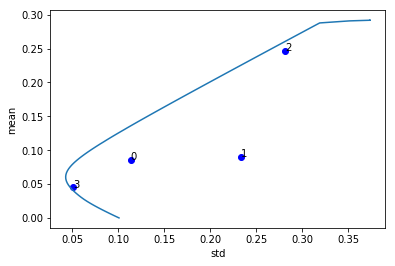

In [6]:
# target profits
x = np.linspace(0, 0.3, 100)

# instruments solo
for col in data:
  m, s = data[col].mean(), data[col].std() 
  plt.scatter(s, m, color='blue')
  plt.annotate(col, (s, m))
  
# optimize portfolios
results = [markovitz(data, x_) for x_ in x] 

# plot frontier
means = [z[1] for z in results]
stds = [z[2] for z in results]
plt.plot(stds, means)
plt.xlabel('std')
plt.ylabel('mean')
pass

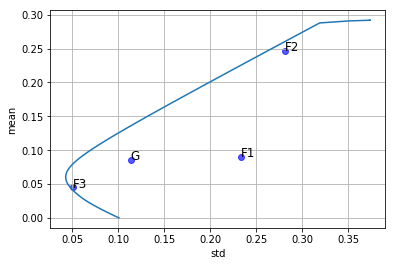

In [26]:
def plot_frontier(data, target_returns, labels):
    '''
    calculates markovitz portfolios for given target returns,
    plots and returns them
    '''
    
    data = pd.DataFrame(data=data.values, columns=labels)
    
    for col in data:
      m, s = data[col].mean(), data[col].std() 
      plt.scatter(s, m, color='blue', alpha=0.65)
      plt.annotate(col, (s, m), fontsize='large')
    
    # optimize portfolios
    results = [markovitz(data, x_) for x_ in x] 

    # plot frontier
    means = [z[1] for z in results]
    stds = [z[2] for z in results]
    plt.plot(stds, means)
    plt.xlabel('std')
    plt.ylabel('mean')
    plt.grid()
    
    return results
    
plot_frontier(data, np.linspace(0, 0.3, 200), ['G', 'F1', 'F2', 'F3'])
pass